In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms


In [2]:
use_cuda = torch.cuda.is_available()
print(use_cuda)
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.RandomCrop(size=28),
                        transforms.RandomRotation(degrees=7, fill=1),
                        # transforms.RandomAffine(degrees=20, translate=(0.1,0.1), scale=(0.9, 1.1)),
                        transforms.ColorJitter(brightness=0.2, contrast=0.2),
                        transforms.Normalize((0.1307,), (0.3081,)), 
                        
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
train_iter = iter(train_loader)


True


Text(0.5, 0, '4')

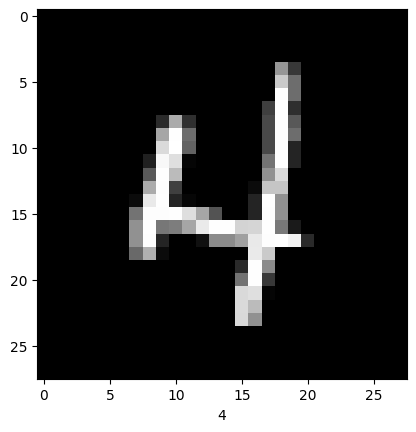

In [3]:

batch_data = next(train_iter)
imgs, labels = batch_data 
import matplotlib.pyplot as plt
plt.imshow(imgs[0].cpu().numpy().reshape((28,28)), cmap="gray")
plt.xlabel(labels[0].item())

In [4]:
from model2 import Model

In [5]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Model().to(device)
summary(model, input_size=(1, 28, 28))

Defaulting to user installation because normal site-packages is not writeable
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              80
              ReLU-2            [-1, 8, 28, 28]               0
       BatchNorm2d-3            [-1, 8, 28, 28]              16
           Dropout-4            [-1, 8, 28, 28]               0
            Conv2d-5            [-1, 8, 28, 28]             584
              ReLU-6            [-1, 8, 28, 28]               0
       BatchNorm2d-7            [-1, 8, 28, 28]              16
           Dropout-8            [-1, 8, 28, 28]               0
            Conv2d-9           [-1, 10, 28, 28]             730
             ReLU-10           [-1, 10, 28, 28]               0
      BatchNorm2d-11           [-1, 10, 28, 28]              20
          Dropout-12           [-1, 10, 28, 28]               0
        MaxPool2d-13     

c:\Users\Sriharsha\Documents\ERA-V6\model2.py:92: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [6]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')


def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [7]:

model = Model().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.03, momentum=0.9)

for epoch in range(1, 20):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]

loss=0.17645913362503052 batch_id=468: 100%|██████████| 469/469 [00:50<00:00,  9.20it/s] 



Test set: Average loss: 0.0730, Accuracy: 9774/10000 (97.74%)



loss=0.05226840451359749 batch_id=468: 100%|██████████| 469/469 [00:50<00:00,  9.28it/s] 



Test set: Average loss: 0.0388, Accuracy: 9878/10000 (98.78%)



loss=0.08491190522909164 batch_id=468: 100%|██████████| 469/469 [00:50<00:00,  9.28it/s] 



Test set: Average loss: 0.0408, Accuracy: 9876/10000 (98.76%)



loss=0.051124002784490585 batch_id=468: 100%|██████████| 469/469 [00:50<00:00,  9.28it/s]



Test set: Average loss: 0.0289, Accuracy: 9910/10000 (99.10%)



loss=0.0842355489730835 batch_id=468: 100%|██████████| 469/469 [00:50<00:00,  9.35it/s]  



Test set: Average loss: 0.0224, Accuracy: 9933/10000 (99.33%)



loss=0.06474775075912476 batch_id=468: 100%|██████████| 469/469 [00:49<00:00,  9.40it/s] 



Test set: Average loss: 0.0337, Accuracy: 9904/10000 (99.04%)



loss=0.027794569730758667 batch_id=468: 100%|██████████| 469/469 [00:49<00:00,  9.43it/s]



Test set: Average loss: 0.0247, Accuracy: 9924/10000 (99.24%)



loss=0.004300772678107023 batch_id=468: 100%|██████████| 469/469 [00:49<00:00,  9.50it/s] 



Test set: Average loss: 0.0216, Accuracy: 9934/10000 (99.34%)



loss=0.04587597772479057 batch_id=468: 100%|██████████| 469/469 [00:50<00:00,  9.26it/s]  



Test set: Average loss: 0.0207, Accuracy: 9936/10000 (99.36%)



loss=0.03630325570702553 batch_id=468: 100%|██████████| 469/469 [00:50<00:00,  9.28it/s]  



Test set: Average loss: 0.0202, Accuracy: 9930/10000 (99.30%)



loss=0.024780260398983955 batch_id=468: 100%|██████████| 469/469 [42:31<00:00,  5.44s/it]   



Test set: Average loss: 0.0203, Accuracy: 9937/10000 (99.37%)



loss=0.042807210236787796 batch_id=468: 100%|██████████| 469/469 [00:53<00:00,  8.83it/s] 



Test set: Average loss: 0.0224, Accuracy: 9921/10000 (99.21%)



loss=0.05138729140162468 batch_id=468: 100%|██████████| 469/469 [00:52<00:00,  8.86it/s] 



Test set: Average loss: 0.0259, Accuracy: 9917/10000 (99.17%)



loss=0.02268470823764801 batch_id=468: 100%|██████████| 469/469 [00:50<00:00,  9.21it/s]  



Test set: Average loss: 0.0204, Accuracy: 9937/10000 (99.37%)



loss=0.02781677432358265 batch_id=468: 100%|██████████| 469/469 [00:54<00:00,  8.68it/s]  



Test set: Average loss: 0.0210, Accuracy: 9927/10000 (99.27%)



loss=0.0376250185072422 batch_id=468: 100%|██████████| 469/469 [00:51<00:00,  9.13it/s]   



Test set: Average loss: 0.0201, Accuracy: 9931/10000 (99.31%)



loss=0.008112812414765358 batch_id=468: 100%|██████████| 469/469 [00:51<00:00,  9.09it/s] 



Test set: Average loss: 0.0177, Accuracy: 9940/10000 (99.40%)



loss=0.08848843723535538 batch_id=468: 100%|██████████| 469/469 [00:51<00:00,  9.18it/s]  



Test set: Average loss: 0.0184, Accuracy: 9934/10000 (99.34%)



loss=0.047666534781455994 batch_id=468: 100%|██████████| 469/469 [00:55<00:00,  8.44it/s] 



Test set: Average loss: 0.0211, Accuracy: 9930/10000 (99.30%)



In [8]:
dropout_value = 0.05
class Model2(nn.Module):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        # rin: 1, rout: 3, in_size: 28, out_size:28
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, 4, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(4),
            nn.Dropout(dropout_value)
        )

        # rin: 3, rout: 5, in_size: 28, out_size:28
        self.conv2 = nn.Sequential(
            nn.Conv2d(4, 8, 3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(8),
            nn.Dropout(dropout_value)
        )

        # rin: 5, rout: 6, in_size: 14, out_size:14
        self.pool1 = nn.MaxPool2d(2,2)
        self.ant1 = nn.Conv2d(8, 4, 1)

        # rin: 6, rout: 10, in_size: 14, out_size:12
        self.conv3 = nn.Sequential(nn.Conv2d(4, 6, 3),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(6),
                                    nn.Dropout(dropout_value)
                                    )
        
        # rin: 10, rout: 14, in_size: 14, out_size:10
        self.conv4 = nn.Sequential(nn.Conv2d(6, 8, 3),
                                    nn.ReLU(),
                                    nn.BatchNorm2d(8),
                                    nn.Dropout(dropout_value)
                                    )
     

        # rin: 14, rout: 18, in_size: 14, out_size:8
        self.conv5 = nn.Sequential(nn.Conv2d(8, 10, 3),
                                nn.ReLU(),
                                nn.BatchNorm2d(10),
                                nn.Dropout(dropout_value)
                                )
        
                # rin: 18, rout: 22, in_size: 12, out_size:6
        self.conv6 = nn.Sequential(nn.Conv2d(10, 10, 3),
                                nn.ReLU(),
                                nn.BatchNorm2d(10),
                                nn.Dropout(dropout_value)
                                )
        
             # rin: 22, rout: 26, in_size: 10, out_size:4
        self.conv7 = nn.Sequential(nn.Conv2d(10, 10, 3),
                                nn.ReLU(),
                                nn.BatchNorm2d(10),
                                nn.Dropout(dropout_value)
                                )
        
        
        # rin: 24, rout: 32, in_size: 8, out_size:2
        self.conv8 = nn.Sequential(nn.Conv2d(10, 10, 3),nn.BatchNorm2d(10),nn.ReLU(), nn.Dropout(dropout_value))
        self.linear = nn.Linear(10*2*2,10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.pool1(x)
        x = self.ant1(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = self.conv6(x)
        x = self.conv7(x)
        x = self.conv8(x)
        x = x.view(-1,10*2*2)
        x = self.linear(x)
        return F.log_softmax(x)
      


In [9]:

# !pip install torchsummary
# from torchsummary import summary
# use_cuda = torch.cuda.is_available()
# device = torch.device("cuda" if use_cuda else "cpu")
# model = Model2().to(device)
# summary(model, input_size=(1, 28, 28))

In [10]:

# model = Model2().to(device)
# optimizer = optim.SGD(model.parameters(), lr=0.04, momentum=0.9)

# for epoch in range(1, 10):
#     train(model, device, train_loader, optimizer, epoch)
#     test(model, device, test_loader)